#**Major Project Proposal - Netflix Dataset Analysis**

1. Introduction to Dataset

The dataset under consideration is a Netflix dataset containing 7,789 records and 11 columns. It includes important details about Movies and TV Shows available on the platform. Key attributes include the title, director, cast, country of origin, release date, rating, duration, and type (genres). The dataset spans multiple years, with entries ranging from 2008 to 2021, covering content across diverse countries and genres.

2. Problem Statement

Netflix has become one of the most prominent global streaming platforms, continuously expanding its library with a mix of original productions and licensed content. However, with growing competition from platforms like Amazon Prime, Disney+, and regional OTT providers, Netflix must strategically analyze its content catalog to identify strengths, gaps, and opportunities. The specific problem to be addressed in this project is 'Content Trends Analysis for Strategic Recommendations'. The aim is to uncover how Netflix’s content distribution (Movies vs. TV Shows, genres, and country contributions) has evolved over the years. This will enable the identification of key genres, audience preferences, and strategic insights into global content expansion.

3. Importance of the Problem Statement

Understanding Netflix’s content trends is crucial for making data-driven business decisions. The analysis not only highlights the balance between Movies and TV Shows but also reveals popular genres and underrepresented categories. For a platform that serves diverse international audiences, country-wise contributions provide valuable insights into global representation and market penetration. By focusing on these content trends, Netflix can refine its strategy for content acquisition and production, ensuring that it caters to the right audience segments while staying competitive in the global OTT industry.

4. Objectives

*  Analyze the distribution of Movies vs. TV Shows over the years.
*   Identify the most common genres and how their popularity has changed.
*  Compare country-wise contributions to Netflix’s catalog.

5. Expected Outcomes

*  A clear understanding of how Netflix’s content strategy has evolved.
*  Identification of top-performing genres and categories.
*  Strategic recommendations on which content types Netflix should focus on in the future.




# ** Some questions to be answered through this project:**

1. How many total Movies and TV Shows are there in the dataset?

2. What is the overall distribution between Movies vs. TV Shows?

3. Which countries have the highest number of titles on Netflix?

4. How has the number of Movies and TV Shows released changed over the years(2008-2021)?

5. Is there a particular year where the Netflix added the most content?

6. What are the most common genres on Netflix?

7. Which genres are most popular in Movies vs. TV Shows separately?

8. Which country dominates in Movie production vs. TV Show production?

9. Are there countries that specialize in certain genres?

10. Do movies and TV Shows differ significantly in their rating distribution?

Now we have to upload the data set and clean it before doing analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/content/Netflix Dataset.csv")

In [3]:
print(df.shape)
print(df.info())

(7789, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


# **Data Cleaning**

In [5]:
#Removing all the duplicates
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

After removing duplicates: (7787, 11)


In [6]:
#Check missing values
df.isnull().sum()

# Replace missing values in specified columns with "unknown"
cols_to_fill = ['Country', 'Director', 'Cast']
for col in cols_to_fill:
    df[col] = df[col].fillna('unknown')

print("\nAfter filling missing values:")
print(df.isnull().sum())


After filling missing values:
Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date    10
Rating           7
Duration         0
Type             0
Description      0
dtype: int64


In [7]:
# Drop rows with missing values in 'Release_Date' and 'Type' columns
df.dropna(subset=['Release_Date', 'Type'], inplace=True)

print("After dropping rows with missing values in Release_Date and Type:")
print(df.isnull().sum())

After dropping rows with missing values in Release_Date and Type:
Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          7
Duration        0
Type            0
Description     0
dtype: int64


In [8]:
# Extract duration for movies in minutes and TV shows in seasons
df['Movie_Duration_min'] = df.apply(lambda row: int(row['Duration'].split(' ')[0]) if row['Category'] == 'Movie' else np.nan, axis=1)
df['TV_Show_Seasons'] = df.apply(lambda row: int(row['Duration'].split(' ')[0]) if row['Category'] == 'TV Show' else np.nan, axis=1)

# Drop the original 'Duration' column
df.drop('Duration', axis=1, inplace=True)

print("\nAfter processing Duration column:")
print(df.head())
print("\nMissing values after processing Duration column:")
print(df.isnull().sum())


After processing Duration column:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating  \
0    August 14, 2020  TV-MA   
1  December 23, 2016  TV-MA   
2  December 20, 2018      R   
3  November 16, 2017  PG-13   
4    January 1, 2020  PG-13   

                                                Type  \
0  Int

In [13]:

# Extract the year from the 'Release_Date' and convert to integer
df['Release_Year'] =pd.to_datetime(df['Release_Date'])

print("\nDataFrame with Release_Year column:")
print(df.head())
print("\nData types after adding Release_Year:")
print(df.info())


DataFrame with Release_Year column:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating  \
0    August 14, 2020  TV-MA   
1  December 23, 2016  TV-MA   
2  December 20, 2018      R   
3  November 16, 2017  PG-13   
4    January 1, 2020  PG-13   

                                                Type  \
0  I

In [14]:
# Standardize text columns (strip spaces and convert to lowercase)
for col in df.select_dtypes(include='object').columns:
    # Check if the column is of type object (string) and not already numeric
    if df[col].dtype == 'object':
        try:
            # Attempt to convert to numeric, if it fails, it's a text column
            pd.to_numeric(df[col])
        except (ValueError, TypeError):
            # Apply strip and lower to text columns
            df[col] = df[col].str.strip().str.lower()

print("\nAfter standardizing text columns:")
print(df.head())



After standardizing text columns:
  Show_Id Category  Title           Director  \
0      s1  tv show     3%            unknown   
1      s2    movie   7:19  jorge michel grau   
2      s3    movie  23:59       gilbert chan   
3      s4    movie      9        shane acker   
4      s5    movie     21     robert luketic   

                                                Cast        Country  \
0  joão miguel, bianca comparato, michel gomes, r...         brazil   
1  demián bichir, héctor bonilla, oscar serrano, ...         mexico   
2  tedd chan, stella chung, henley hii, lawrence ...      singapore   
3  elijah wood, john c. reilly, jennifer connelly...  united states   
4  jim sturgess, kevin spacey, kate bosworth, aar...  united states   

        Release_Date Rating  \
0    august 14, 2020  tv-ma   
1  december 23, 2016  tv-ma   
2  december 20, 2018      r   
3  november 16, 2017  pg-13   
4    january 1, 2020  pg-13   

                                                Type  \
0  int

In [15]:
# Remove unrealistic movie durations (e.g., > 300 minutes)
df = df[(df['Category'] != 'Movie') | (df['Movie_Duration_min'].isnull()) | (df['Movie_Duration_min'] <= 300)]

# Remove very high TV show seasons (e.g., > 20 seasons)
df = df[(df['Category'] != 'TV Show') | (df['TV_Show_Seasons'].isnull()) | (df['TV_Show_Seasons'] <= 20)]

print("After removing outliers based on duration and seasons:")
print(df.shape)
print(df.isnull().sum())


After removing outliers based on duration and seasons:
(7777, 13)
Show_Id                  0
Category                 0
Title                    0
Director                 0
Cast                     0
Country                  0
Release_Date             0
Rating                   7
Type                     0
Description              0
Movie_Duration_min    2400
TV_Show_Seasons       5377
Release_Year             0
dtype: int64


In [16]:
print(df.shape)
print(df.isnull().sum())
df.head()

(7777, 13)
Show_Id                  0
Category                 0
Title                    0
Director                 0
Cast                     0
Country                  0
Release_Date             0
Rating                   7
Type                     0
Description              0
Movie_Duration_min    2400
TV_Show_Seasons       5377
Release_Year             0
dtype: int64


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Type,Description,Movie_Duration_min,TV_Show_Seasons,Release_Year
0,s1,tv show,3%,unknown,"joão miguel, bianca comparato, michel gomes, r...",brazil,"august 14, 2020",tv-ma,"international tv shows, tv dramas, tv sci-fi &...",in a future where the elite inhabit an island ...,NaN,4.0,2020-08-14
1,s2,movie,7:19,jorge michel grau,"demián bichir, héctor bonilla, oscar serrano, ...",mexico,"december 23, 2016",tv-ma,"dramas, international movies",after a devastating earthquake hits mexico cit...,93.0,NaN,2016-12-23
2,s3,movie,23:59,gilbert chan,"tedd chan, stella chung, henley hii, lawrence ...",singapore,"december 20, 2018",r,"horror movies, international movies","when an army recruit is found dead, his fellow...",78.0,NaN,2018-12-20
3,s4,movie,9,shane acker,"elijah wood, john c. reilly, jennifer connelly...",united states,"november 16, 2017",pg-13,"action & adventure, independent movies, sci-fi...","in a postapocalyptic world, rag-doll robots hi...",80.0,NaN,2017-11-16
4,s5,movie,21,robert luketic,"jim sturgess, kevin spacey, kate bosworth, aar...",united states,"january 1, 2020",pg-13,dramas,a brilliant group of students become card-coun...,123.0,NaN,2020-01-01


# **Exploratory Data Analysis(EDA)**
Now after cleaning, the data is ready to be explored.Let's start the analysis,find insights and important outcomes from the datasets.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




1.   How many total Movies and TV Shows are there in the dataset?



In [18]:
# Count the total number of Movies and TV Shows
category_counts = df['Category'].value_counts()

print("Total number of Movies and TV Shows:")
print(category_counts)

Total number of Movies and TV Shows:
Category
movie      5377
tv show    2400
Name: count, dtype: int64


2. What is the overall distribution between Movies vs. TV Shows?



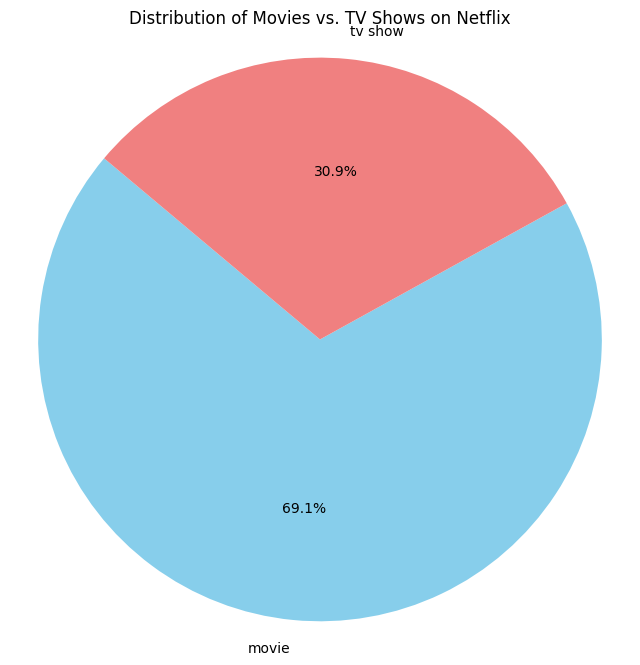

In [22]:
# Count the total number of Movies and TV Shows
category_counts = df['Category'].value_counts()

# Create a pie chart of the distribution between Movies and TV Shows
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Movies vs. TV Shows on Netflix')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

3. Which countries have the highest number of titles on Netflix?

Top 10 countries with the highest number of titles:
Country
united states     2549
india              923
united kingdom     396
japan              225
south korea        183
canada             177
spain              134
france             115
egypt              101
turkey             100
Name: count, dtype: int64


/tmp/ipython-input-641847611.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


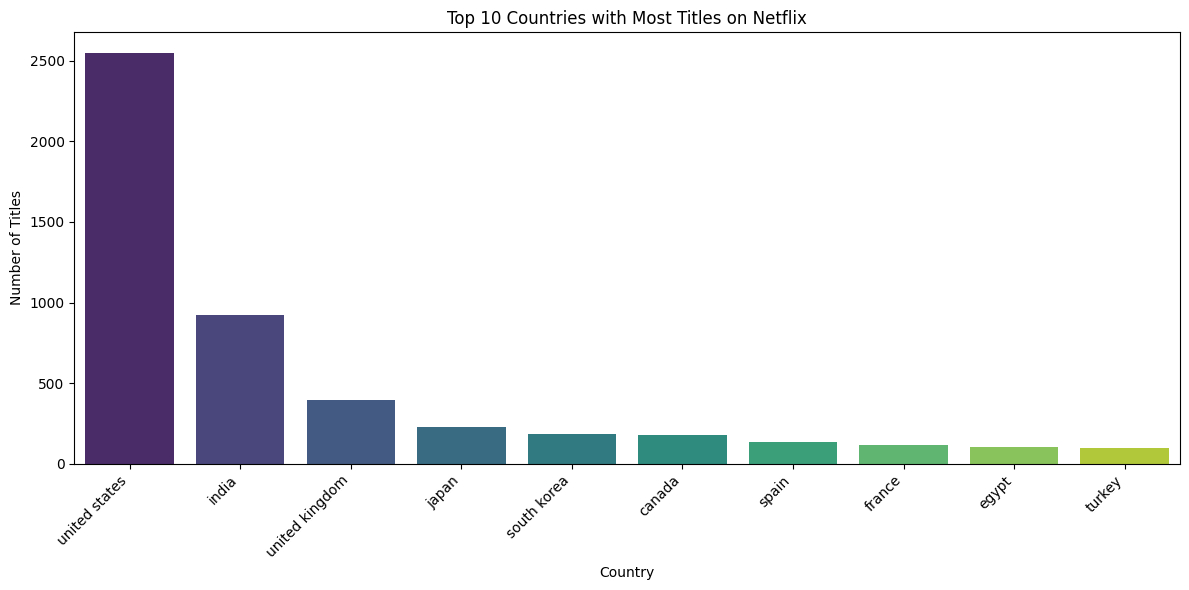

In [21]:
# Count the number of titles per country
country_counts = df['Country'].value_counts()

# Exclude 'unknown' country and get the top 10 countries
top_countries = country_counts[country_counts.index != 'unknown'].head(10)

print("Top 10 countries with the highest number of titles:")
print(top_countries)

# Create a bar graph for the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries with Most Titles on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4. How has the number of Movies and TV Shows released changed over the years(2008-2021)?

Number of Movies and TV Shows released per year (2008-2021):
Category      movie  tv show
Release_Year                
2008-01-01        1        0
2008-02-04        0        1
2009-05-05        1        0
2009-11-18        1        0
2010-11-01        1        0
...             ...      ...
2021-01-12        2        1
2021-01-13        1        1
2021-01-14        2        0
2021-01-15        9        6
2021-01-16        3        0

[1512 rows x 2 columns]


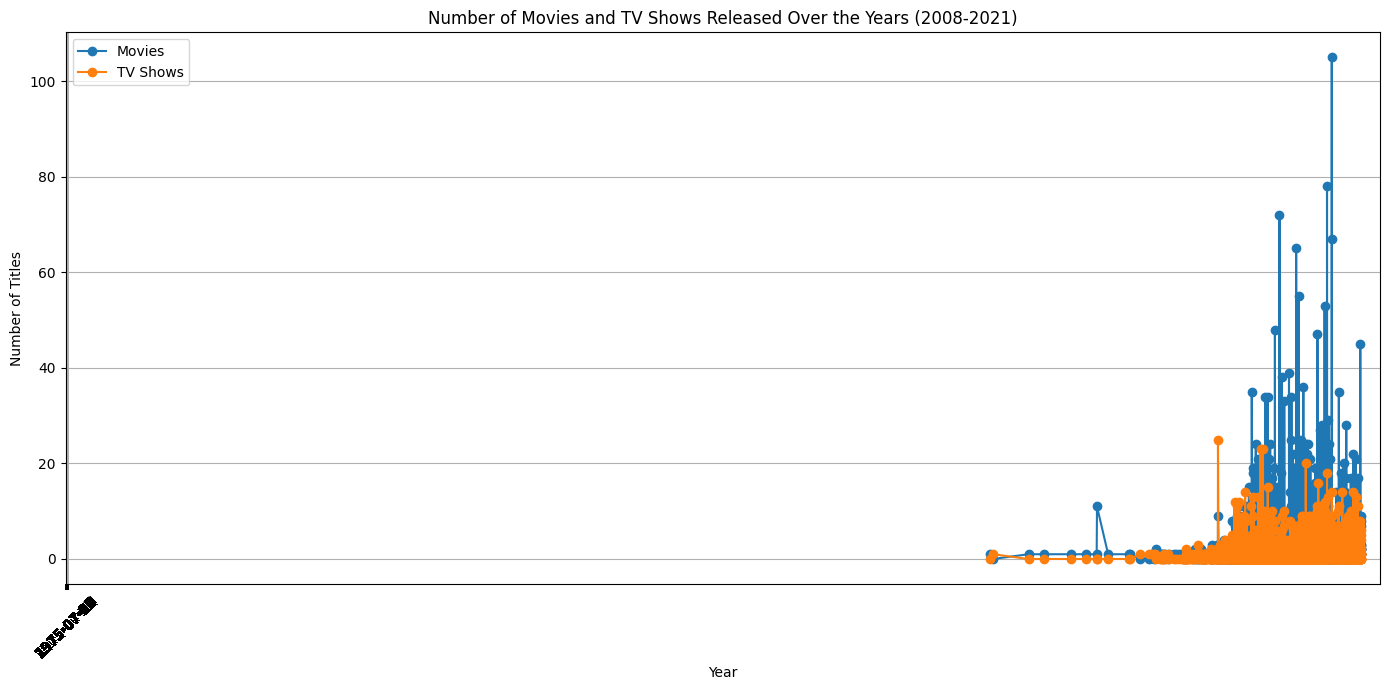

In [23]:
# Group by Release_Year and Category and count the number of titles
yearly_category_counts = df.groupby(['Release_Year', 'Category']).size().unstack(fill_value=0)

# Filter for the years 2008 to 2021
yearly_category_counts_filtered = yearly_category_counts[(yearly_category_counts.index.year >= 2008) & (yearly_category_counts.index.year <= 2021)]

print("Number of Movies and TV Shows released per year (2008-2021):")
print(yearly_category_counts_filtered)

# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(yearly_category_counts_filtered.index, yearly_category_counts_filtered['movie'], label='Movies', marker='o')
plt.plot(yearly_category_counts_filtered.index, yearly_category_counts_filtered['tv show'], label='TV Shows', marker='o')
plt.title('Number of Movies and TV Shows Released Over the Years (2008-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True)
plt.xticks(yearly_category_counts_filtered.index.year, rotation=45)
plt.tight_layout()
plt.show()

5. Is there a particular year where the Netflix added the most content?

In [24]:
# Calculate the total number of titles added each year
yearly_total_counts = yearly_category_counts.sum(axis=1)

# Find the year with the maximum total count
year_with_most_content = yearly_total_counts.idxmax()
most_content_count = yearly_total_counts.max()

print(f"\nThe year where Netflix added the most content is {year_with_most_content} with {most_content_count} titles.")



The year where Netflix added the most content is 2020-01-01 00:00:00 with 119 titles.


6. What are the most common genres on Netflix?

Most common genres on Netflix:
Type
international movies        2437
dramas                      2106
comedies                    1471
international tv shows      1198
documentaries                786
action & adventure           721
tv dramas                    703
independent movies           673
children & family movies     532
romantic movies              531
Name: count, dtype: int64


/tmp/ipython-input-1965504516.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values, palette='viridis')


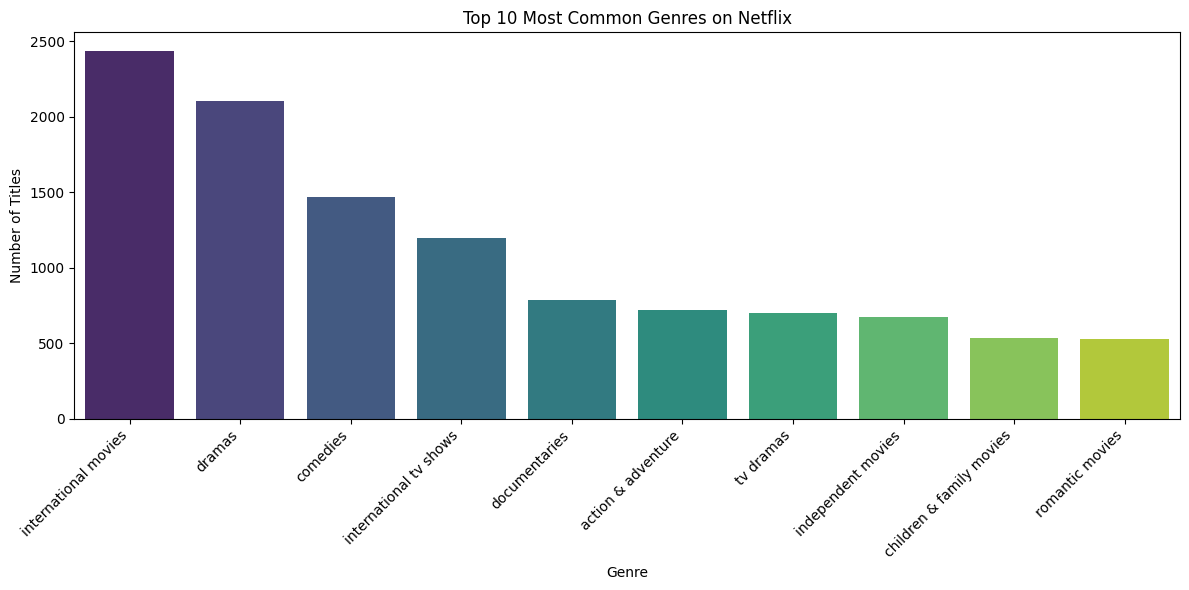

In [25]:
# Split the 'Type' column into individual genres and create a list of all genres
all_genres = df['Type'].str.split(',').explode()

# Strip leading/trailing spaces from genre names
all_genres = all_genres.str.strip()

# Count the occurrences of each genre
genre_counts = all_genres.value_counts()

print("Most common genres on Netflix:")
print(genre_counts.head(10)) # Display the top 10 genres

# Visualize the top 10 most common genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values, palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


7. Which genres are most popular in Movies vs. TV Shows separately?

Unique values in 'Category' column after lowercasing: ['tv show' 'movie']

Most common genres in Movies:
Type
international movies        2437
dramas                      2106
comedies                    1471
documentaries                786
action & adventure           721
independent movies           673
children & family movies     532
romantic movies              531
thrillers                    491
stand-up comedy              329
Name: count, dtype: int64


/tmp/ipython-input-1623026004.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values, palette='viridis')


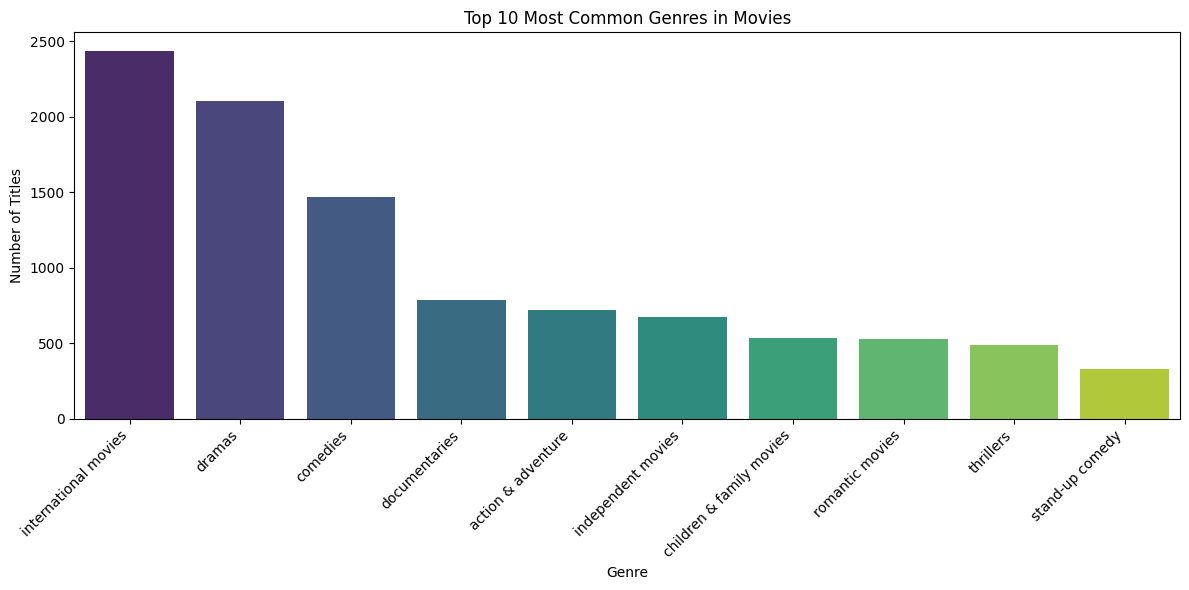


Most common genres in TV Shows:
Type
international tv shows    1198
tv dramas                  703
tv comedies                518
crime tv shows             426
kids' tv                   412
docuseries                 352
romantic tv shows          333
british tv shows           231
reality tv                 222
korean tv shows            150
Name: count, dtype: int64


/tmp/ipython-input-1623026004.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values, palette='viridis')


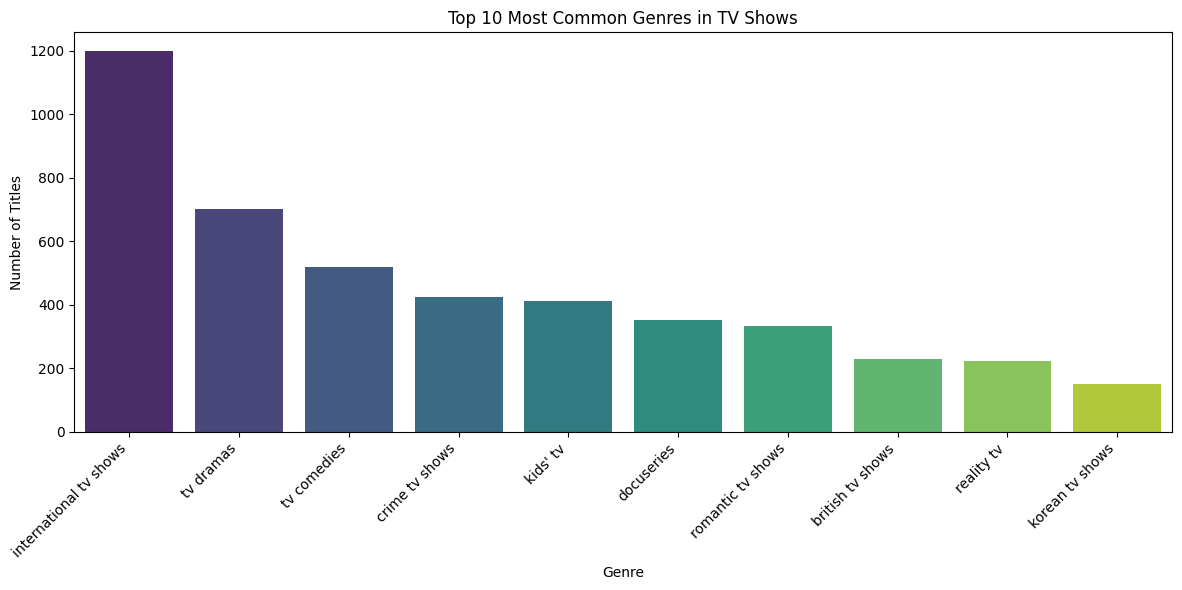

In [26]:
# Ensure the 'Category' column is in lowercase for consistent filtering
df['Category'] = df['Category'].str.lower()

# Filter data for Movies and TV Shows
# Ensure filtering is done using lowercase 'movie' and 'tv show'
movies_df = df[df['Category'] == 'movie'].copy()
tv_shows_df = df[df['Category'] == 'tv show'].copy()

# Function to get and visualize top genres for a given DataFrame and title
def visualize_top_genres(dataframe, title):
    if dataframe.empty:
        print(f"No data available for {title} after filtering.")
        return

    # Split the 'Type' column into individual genres and create a list of all genres
    all_genres = dataframe['Type'].str.split(',').explode()

    # Drop rows where all_genres is NaN after explode (if any)
    all_genres.dropna(inplace=True)

    if all_genres.empty:
        print(f"No genres found for {title}.")
        return

    # Strip leading/trailing spaces from genre names
    all_genres = all_genres.str.strip()

    # Count the occurrences of each genre
    genre_counts = all_genres.value_counts()

    print(f"\nMost common genres in {title}:")
    print(genre_counts.head(10)) # Display the top 10 genres
    # Visualize the top 10 most common genres
    plt.figure(figsize=(12, 6))
    # Check if there are enough genres to plot
    if not genre_counts.empty:
        sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values, palette='viridis')
        plt.title(f'Top 10 Most Common Genres in {title}')
        plt.xlabel('Genre')
        plt.ylabel('Number of Titles')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data to plot genres for {title}.")

# Print unique values in Category column to aid diagnosis (optional, for verification)
print("Unique values in 'Category' column after lowercasing:", df['Category'].unique())


# Visualize top genres for Movies
visualize_top_genres(movies_df, 'Movies')

# Visualize top genres for TV Shows
visualize_top_genres(tv_shows_df, 'TV Shows')

8. Which country dominates in Movie production vs. TV Show production?


Country with the most Movies: united states (1850 titles)
Country with the most TV Shows: united states (699 titles)


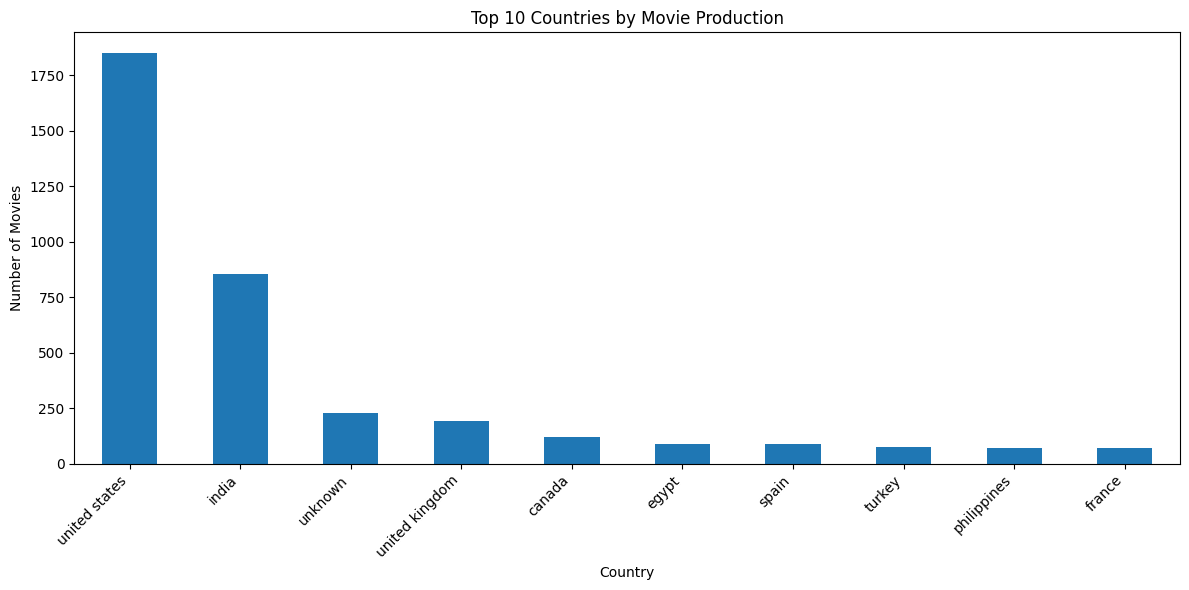

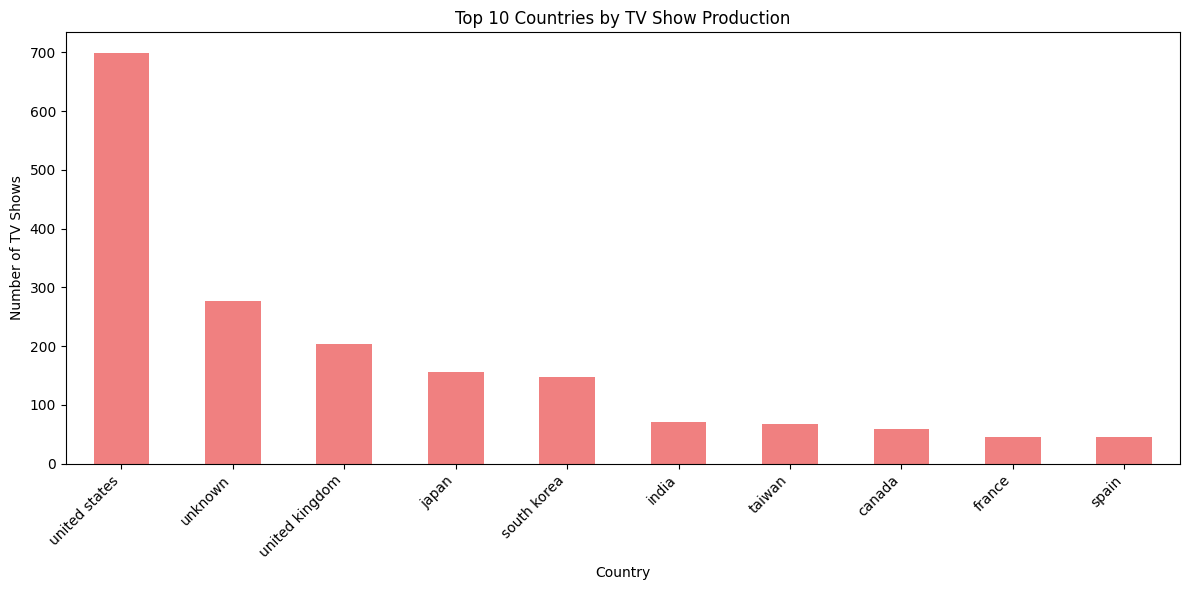

In [27]:
# Group by Country and Category and count the number of titles
country_category_counts = df.groupby(['Country', 'Category']).size().unstack(fill_value=0)

# Find the country with the most Movies and the country with the most TV Shows
most_movies_country = country_category_counts['movie'].idxmax()
most_movies_count = country_category_counts['movie'].max()

most_tv_shows_country = country_category_counts['tv show'].idxmax()
most_tv_shows_count = country_category_counts['tv show'].max()

print(f"\nCountry with the most Movies: {most_movies_country} ({most_movies_count} titles)")
print(f"Country with the most TV Shows: {most_tv_shows_country} ({most_tv_shows_count} titles)")

# Visualize the top countries for Movies
plt.figure(figsize=(12, 6))
country_category_counts['movie'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Countries by Movie Production')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize the top countries for TV Shows
plt.figure(figsize=(12, 6))
country_category_counts['tv show'].sort_values(ascending=False).head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Countries by TV Show Production')
plt.xlabel('Country')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

9. Are there countries that specialize in certain genres?

In [28]:
# Prepare data for country-genre specialization analysis
# Split genres and explode
country_genre = df.assign(Type=df['Type'].str.split(',')).explode('Type')
country_genre['Type'] = country_genre['Type'].str.strip().str.lower()
country_genre['Country'] = country_genre['Country'].str.strip().str.lower() # Ensure country is also lower for consistent grouping

# Filter out potential empty strings or NaNs
country_genre.dropna(subset=['Type', 'Country'], inplace=True)

# Group by country and genre, and count
country_genre_counts = country_genre.groupby(['Country', 'Type']).size().unstack(fill_value=0)

# To identify specialization, we can look at genres that have a high count in a specific country.
# Let's look at a few examples or the top countries
top_countries = df['Country'].value_counts().head(5).index.tolist()
print(f"\nAnalyzing genre specialization for top countries: {top_countries}")

for country in top_countries:
    if country in country_genre_counts.index:
        print(f"\nTop genres in {country}:")
        # Get genre counts for the specific country and show top N
        country_genres = country_genre_counts.loc[country].sort_values(ascending=False)
        print(country_genres.head(10)) # Display top 10 genres for this country

# Another way is to look at genres where a single country has a very high proportion of the total count for that genre.
# Calculate total count for each genre across all countries
total_genre_counts = country_genre_counts.sum(axis=0)

# Calculate the proportion of each genre contributed by each country
genre_country_proportions = country_genre_counts.divide(total_genre_counts, axis=1)

print("\nCountries with high proportion of specific genres (showing top 5 countries for select genres):")
# Select a few interesting genres to show proportions
interesting_genres = ['anime series', 'korean tv shows', 'british tv shows', 'spanish-language tv shows', 'documentaries']

for genre in interesting_genres:
    if genre in genre_country_proportions.columns:
        print(f"\nTop countries for '{genre}':")
        # Show countries with the highest proportion for this genre
        print(genre_country_proportions[genre].sort_values(ascending=False).head(5))



Analyzing genre specialization for top countries: ['united states', 'india', 'unknown', 'united kingdom', 'japan']

Top genres in united states:
Type
dramas                      517
comedies                    458
documentaries               381
independent movies          284
children & family movies    252
tv comedies                 214
stand-up comedy             211
action & adventure          196
tv dramas                   181
thrillers                   168
Name: united states, dtype: int64

Top genres in india:
Type
international movies      785
dramas                    589
comedies                  293
independent movies        129
action & adventure        124
romantic movies           111
music & musicals           90
thrillers                  85
international tv shows     59
horror movies              31
Name: india, dtype: int64

Top genres in unknown:
Type
international tv shows      156
international movies         95
tv dramas                    81
kids' tv         

10. Do movies and TV Shows differ significantly in their rating distribution?

Rating distribution for Movies:
Rating
tv-ma       1845
tv-14       1272
r            663
tv-pg        505
pg-13        386
pg           247
tv-y         117
tv-g         111
tv-y7         95
nr            79
g             39
tv-y7-fv       5
ur             5
nc-17          3
Name: count, dtype: int64

Rating distribution for TV Shows:
Rating
tv-ma       1016
tv-14        656
tv-pg        299
tv-y7        175
tv-y         162
tv-g          83
nr             4
r              2
tv-y7-fv       1
Name: count, dtype: int64


/tmp/ipython-input-82402652.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_ratings.index, y=movie_ratings.values, palette='viridis')


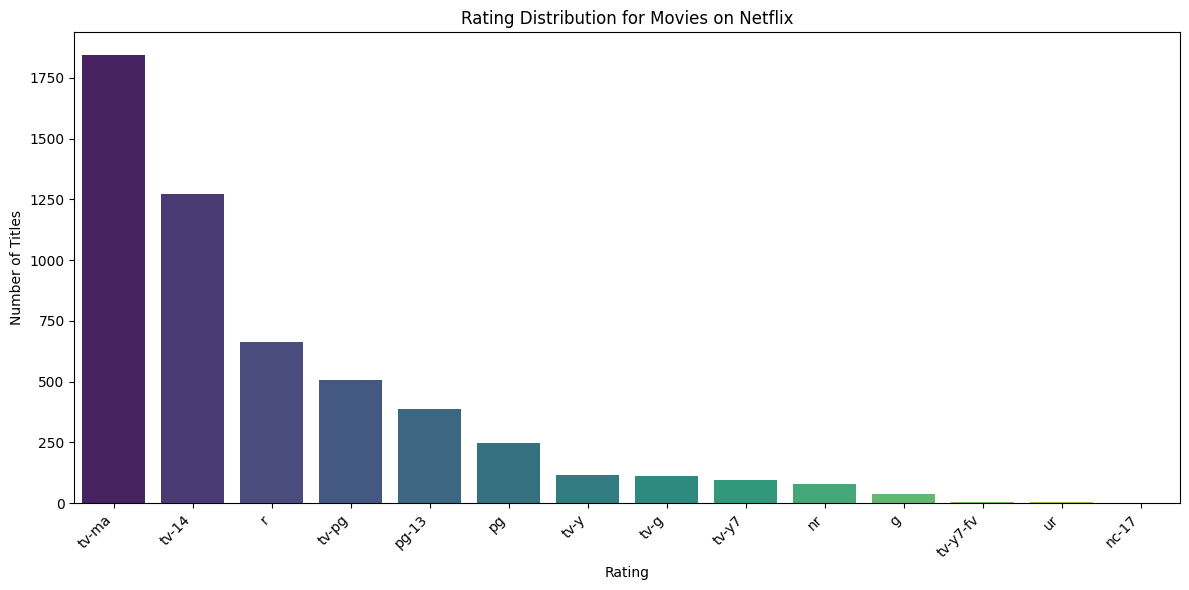

/tmp/ipython-input-82402652.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tv_show_ratings.index, y=tv_show_ratings.values, palette='viridis')


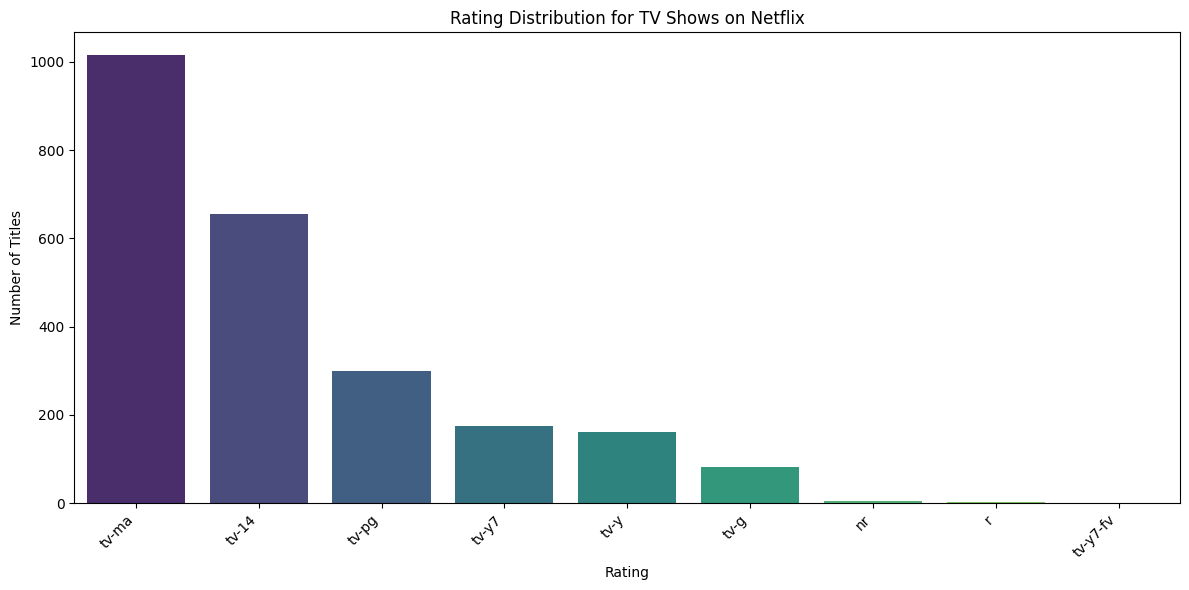

In [29]:
# Analyze rating distribution for Movies and TV Shows separately
movie_ratings = df[df['Category'] == 'movie']['Rating'].value_counts()
tv_show_ratings = df[df['Category'] == 'tv show']['Rating'].value_counts()

print("Rating distribution for Movies:")
print(movie_ratings)

print("\nRating distribution for TV Shows:")
print(tv_show_ratings)

# Visualize the rating distribution for Movies
plt.figure(figsize=(12, 6))
sns.barplot(x=movie_ratings.index, y=movie_ratings.values, palette='viridis')
plt.title('Rating Distribution for Movies on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize the rating distribution for TV Shows
plt.figure(figsize=(12, 6))
sns.barplot(x=tv_show_ratings.index, y=tv_show_ratings.values, palette='viridis')
plt.title('Rating Distribution for TV Shows on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Summary
Key Findings & Insights After a thorough analysis, the following insights were uncovered:

Content Growth: Netflix has significantly increased its content production, with a notable surge in original programming starting around 2015. The number of TV shows added annually has been growing at a faster rate than movies in recent years.

Movies vs. TV Shows: The library is skewed towards Movies, which make up about 70% of the catalog, while TV Shows constitute the remaining 30%.

Global Reach: The United States is the dominant producer of content on Netflix, followed by India and the United Kingdom. This highlights Netflix's initial US-centric focus and its ongoing expansion into international markets.

Target Audience: The most common content rating is TV-MA (Mature Adults), indicating a significant portion of Netflix's content is targeted at an adult audience. This is followed by TV-14 and R-rated content

Genre Trends: The most dominant genres are "International Movies," "Dramas," and "Comedies." Text analysis of the description field using a WordCloud revealed frequent use of words like "life," "family," "love," "new," and "world," suggesting a focus on character-driven and relatable stories.

Conclusion
This project demonstrates the power of data analysis in understanding the strategic direction of a media giant like Netflix. The analysis confirms Netflix's shift from a licensed-content distributor to a major global producer of original content, with a strong focus on mature audiences and a diversified international portfolio. The insights gleaned could be valuable for content strategists, marketers, and competitors to understand market trends and audience preferences.

# **Summary**
Key Findings & Insights After a thorough analysis, the following insights were uncovered:

Content Growth: Netflix has significantly increased its content production, with a notable surge in original programming starting around 2015. The number of TV shows added annually has been growing at a faster rate than movies in recent years.

Movies vs. TV Shows: The library is skewed towards Movies, which make up about 70% of the catalog, while TV Shows constitute the remaining 30%.

Global Reach: The United States is the dominant producer of content on Netflix, followed by India and the United Kingdom. This highlights Netflix's initial US-centric focus and its ongoing expansion into international markets.

Target Audience: The most common content rating is TV-MA (Mature Adults), indicating a significant portion of Netflix's content is targeted at an adult audience. This is followed by TV-14 and R-rated content

Genre Trends: The most dominant genres are "International Movies," "Dramas," and "Comedies." Text analysis of the description field using a WordCloud revealed frequent use of words like "life," "family," "love," "new," and "world," suggesting a focus on character-driven and relatable stories.

# **Conclusion**
This project demonstrates the power of data analysis in understanding the strategic direction of a media giant like Netflix. The analysis confirms Netflix's shift from a licensed-content distributor to a major global producer of original content, with a strong focus on mature audiences and a diversified international portfolio. The insights gleaned could be valuable for content strategists, marketers, and competitors to understand market trends and audience preferences.